In [40]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
digits = datasets.load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [13]:
digits.data.shape

(1797, 64)

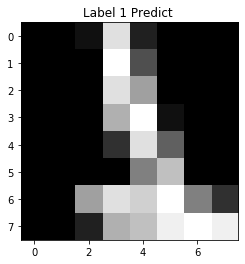

In [26]:
def plot_image(x, y, y_pred=""):
    plt.imshow(np.reshape(x, (8,8)), cmap=plt.cm.gray)
    plt.title(f'Label {y} Predict {y_pred}')
plot_image(digits.data[1000], digits.target[1000])
plt.show()

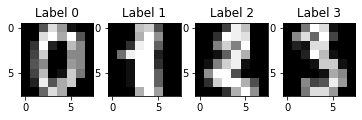

In [15]:
for i in range(0, 4):
    plt.subplot(1, 4, i+1)
    plot_image(digits.data[i], digits.target[i])
plt.show()

In [17]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=1/3, random_state=42)

In [18]:
x_train.shape, x_test.shape

((1198, 64), (599, 64))

In [21]:
clf = LogisticRegression(max_iter=10000)
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred = clf.predict(x_test)

In [25]:
acc = accuracy_score(y_test, y_pred)
print(f"accuracy {acc*100:.2f}%")

accuracy 97.33%


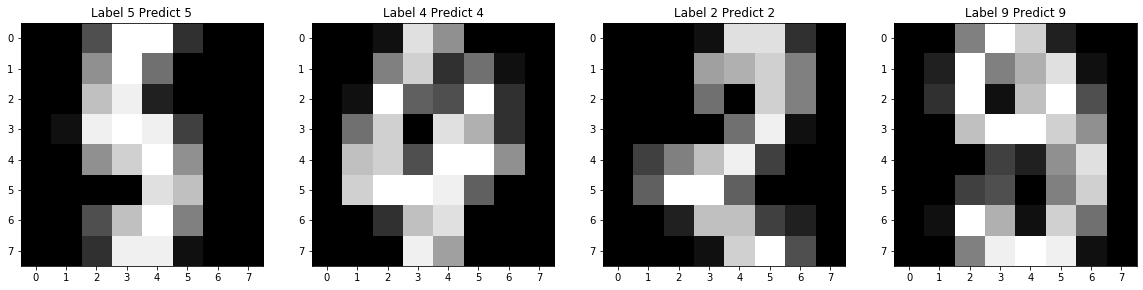

In [36]:
plt.figure(figsize=(20,5))
for i in range(0, 4):
    idx = np.random.randint(0, len(x_test))
    plt.subplot(1, 4, i+1)
    plot_image(x_test[idx], y_test[idx], y_pred[idx])
plt.show()

In [37]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  1,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 55,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 63,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 70,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 61,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 51,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 66]])

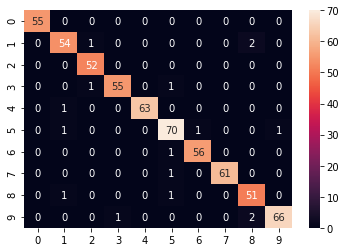

In [43]:
sns.heatmap(conf, annot=True)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.95      0.95      0.95        57
           2       0.96      1.00      0.98        52
           3       0.98      0.96      0.97        57
           4       1.00      0.98      0.99        64
           5       0.95      0.96      0.95        73
           6       0.98      0.98      0.98        57
           7       1.00      0.98      0.99        62
           8       0.93      0.96      0.94        53
           9       0.99      0.96      0.97        69

    accuracy                           0.97       599
   macro avg       0.97      0.97      0.97       599
weighted avg       0.97      0.97      0.97       599

